## Proyek Analisis Data: Bike Sharing Dataset
Nama: Luis Ricardo Pandiangan

Email: luisrichardo777@gmail.com

ID Dicoding: luisricardo777

## Menentukan Pertanyaan Bisnis
1. Kapan penyewaan sepeda mengalami kenaikan dan penurunan?
2. Bagaimana hubungan antara banyaknya penyewaan dengan cuaca?
3. Bagaimana hubungan antara banyaknya penyewaan dengan hari libur?
4. Bagaimana hubungan antara banyaknya penyewaan dengan suhu, kelembapan, dan kecepatan angin?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 
import statsmodels.api as sm

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Terlihat masalah dalam penamaan musim yang menyatakan bulan Januari ialah musim semi. Akan ditindak lanjuti pada Assessing Data

In [3]:
hour_df = pd.read_csv("data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Terlihat masalah dalam penamaan musim yang menyatakan bulan Januari ialah musim semi. Akan ditindak lanjuti di Cleaning data

## Assesing Data

Memeriksa data day_df terlebih dahulu

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari output dapat dilihat bahwa tipe data 'dteday', 'season', 'weathersit' merupakan object dan int. Tipe data tersebut akan diubah pada proses cleaning data

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [7]:
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi day_df:  0


Memeriksa data hour_df

In [8]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Dari output dapat dilihat bahwa tipe data 'dteday', 'season', 'weathersit' merupakan object dan int. Tipe data tersebut akan diubah pada proses cleaning data

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
print("Jumlah duplikasi data hour_df: ", hour_df.duplicated().sum())

Jumlah duplikasi data hour_df:  0


## Cleaning Data

In [12]:
ubah_kolom = {'dteday': 'date', 'yr': 'year', 'temp': 'temperature', 'hum': 'humidity','cnt': 'total'}
day_df.rename(columns=ubah_kolom, inplace=True)
day_df.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
hour_df.rename(columns=ubah_kolom, inplace=True)
hour_df.head()

,instant,date,season,year,mnth,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Mengubah tipe data pada day_df

In [14]:
day_df['season'] = day_df['season'].astype('category')
day_df['season'] = day_df['season'].cat.rename_categories({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['weathersit'] = day_df['weathersit'].cat.rename_categories({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
day_df['year'] = day_df['year'].astype('category')
day_df['year'] = day_df['year'].cat.rename_categories({0: '2011', 1:'2012'})
day_df['date'] = pd.to_datetime(day_df['date'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      731 non-null    int64         
 1   date         731 non-null    datetime64[ns]
 2   season       731 non-null    category      
 3   year         731 non-null    category      
 4   mnth         731 non-null    int64         
 5   holiday      731 non-null    int64         
 6   weekday      731 non-null    int64         
 7   workingday   731 non-null    int64         
 8   weathersit   731 non-null    category      
 9   temperature  731 non-null    float64       
 10  atemp        731 non-null    float64       
 11  humidity     731 non-null    float64       
 12  windspeed    731 non-null    float64       
 13  casual       731 non-null    int64         
 14  registered   731 non-null    int64         
 15  total        731 non-null    int64         
dtypes: categ

In [15]:
day_df.head()

,instant,date,season,year,mnth,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,1,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengubah tipe data hour_df

In [16]:
hour_df['season'] = hour_df['season'].astype('category')
hour_df['season'] = hour_df['season'].cat.rename_categories({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].cat.rename_categories({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})

hour_df['year'] = hour_df['year'].astype('category')
hour_df['year'] = hour_df['year'].cat.rename_categories({0: '2011', 1:'2012'})
hour_df['date'] = pd.to_datetime(hour_df['date'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   instant      17379 non-null  int64         
 1   date         17379 non-null  datetime64[ns]
 2   season       17379 non-null  category      
 3   year         17379 non-null  category      
 4   mnth         17379 non-null  int64         
 5   hr           17379 non-null  int64         
 6   holiday      17379 non-null  int64         
 7   weekday      17379 non-null  int64         
 8   workingday   17379 non-null  int64         
 9   weathersit   17379 non-null  category      
 10  temperature  17379 non-null  float64       
 11  atemp        17379 non-null  float64       
 12  humidity     17379 non-null  float64       
 13  windspeed    17379 non-null  float64       
 14  casual       17379 non-null  int64         
 15  registered   17379 non-null  int64         
 16  tota

In [17]:
hour_df['weathersit'].unique()

['Clear', 'Mist', 'Light Snow', 'Heavy Rain']
Categories (4, object): ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']

In [18]:
hour_df.head()

,instant,date,season,year,mnth,hr,holiday,weekday,workingday,weathersit,temperature,atemp,humidity,windspeed,casual,registered,total
0,1,2011-01-01,Spring,2011,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


Merge data karena data harian dan data jam tidak berbeda signifikan secara fungsi

In [19]:
merge_df = hour_df.merge(day_df, on='date', how='inner', suffixes=('_hour', '_day'))
merge_df.head()

,instant_hour,date,season_hour,year_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,total_day
0,1,2011-01-01,Spring,2011,1,0,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Spring,2011,1,1,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Spring,2011,1,2,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Spring,2011,1,3,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Spring,2011,1,4,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985


Ubah pengkategorian musim karena kesalahan dari dataset dalam membuat musim. ALasannya, pembagian musim di belahan bumi utara adalah sebagai berikut:
1. Musim semi (spring): 20 Maret - 20 Juni
2. Musim panas (summer): 21 Juni - 21 September
3. Musim gugur (fall): 22 September - 20 Desember
4. Musim semi (spring): 21 Desember - 19 Maret

In [20]:
print(merge_df['season_day'].unique())
print(merge_df['season_hour'].unique())

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']
['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Spring', 'Summer', 'Fall', 'Winter']


In [21]:
merge_df['season_day'] = merge_df['season_day'].cat.rename_categories({'Spring': 'Winter', 'Summer':'Spring', 'Fall':'Summer', 'Winter':'Fall'})
merge_df['season_hour'] = merge_df['season_hour'].cat.rename_categories({'Spring': 'Winter', 'Summer':'Spring', 'Fall':'Summer', 'Winter':'Fall'})

In [22]:
merge_df.head()

,instant_hour,date,season_hour,year_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temperature_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,total_day
0,1,2011-01-01,Winter,2011,1,0,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Winter,2011,1,1,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Winter,2011,1,2,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Winter,2011,1,3,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Winter,2011,1,4,0,6,0,Clear,...,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985


### Explore Musim

Untuk melihat penggunaan sepeda per musim

In [23]:
merge_df.groupby('season_day')['total_day'].mean().reset_index().sort_values(by='total_day', ascending=False)

,season_day,total_day
2,Summer,5654.093194
1,Spring,4995.253119
3,Fall,4765.366021
0,Winter,2635.348185


### Explore Bulanan

Untuk mengetahui kapan bulan tertinggi penyewaan terjadi

In [24]:
merge_df.groupby('mnth_day')['total_day'].mean().reset_index().sort_values(by='total_day', ascending=False)

,mnth_day,total_day
5,6,5772.366667
8,9,5772.107864
7,8,5689.239322
6,7,5563.677419
4,5,5349.774194
9,10,5319.965541
3,4,4484.418928
10,11,4245.956159
2,3,3709.164969
11,12,3411.030344


### Explore Jam Kerja

Untuk melihat aktivitas masyarakat dengan penyewaan sepeda

In [25]:
merge_df.groupby('hr')['total_hour'].mean().reset_index()

,hr,total_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


### Explore Hari Libur

Untuk melihat hubungan pengguna sepeda dengan hari libur

In [26]:
merge_df.groupby('holiday_day')['total_day'].mean().reset_index().sort_values("total_day")

,holiday_day,total_day
1,1,3750.060000
0,0,4556.906215


### Explore Cuaca

Untuk mengetahui total pengguna dengan cuaca

In [27]:
merge_df.groupby('weathersit_day')['total_day'].mean().reset_index().sort_values("weathersit_day")

,weathersit_day,total_day
0,Clear,4895.177083
1,Mist,4062.717595
2,Light Snow,1914.700855


In [28]:
merge_df.groupby('weathersit_hour')['total_hour'].mean().reset_index().sort_values("weathersit_hour")

,weathersit_hour,total_hour
0,Clear,204.869272
1,Mist,175.165493
2,Light Snow,111.579281
3,Heavy Rain,74.333333


### Explore Hubungan Antar Variabel Harian

In [29]:
X = merge_df['temperature_day']
y = merge_df['total_day']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              total_day   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:07:04   Log-Likelihood:            -1.5171e+05
No. Observations:               17379   AIC:                         3.034e+05
Df Residuals:                   17377   BIC:                         3.034e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1268.1044     32.940     

Ada hubungan antara suhu harian dengan penggunaan harian dengan keakuratan yang cukup rendah yaitu 39%

In [30]:
X_humidity = merge_df['humidity_day']
y = merge_df['total_day']
X_humidity = sm.add_constant(X_humidity)
model = sm.OLS(y, X_humidity).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              total_day   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     147.2
Date:                Sun, 03 Mar 2024   Prob (F-statistic):           9.61e-34
Time:                        22:07:04   Log-Likelihood:            -1.5595e+05
No. Observations:               17379   AIC:                         3.119e+05
Df Residuals:                   17377   BIC:                         3.119e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5311.1696     65.693     80.848   

Walaupun terdapat hubungan antara kelembapan harian dengan total penggunaan karena berhasil menolak hipotesis, akan tetapi keakuratan model sangat kurang yaitu 0.008% saja

In [31]:
X_windspeed = merge_df['windspeed_day']
y = merge_df['total_day']
X_windspeed = sm.add_constant(X_windspeed)
model = sm.OLS(y, X_windspeed).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              total_day   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     982.6
Date:                Sun, 03 Mar 2024   Prob (F-statistic):          7.40e-210
Time:                        22:07:04   Log-Likelihood:            -1.5554e+05
No. Observations:               17379   AIC:                         3.111e+05
Df Residuals:                   17377   BIC:                         3.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5625.8706     37.606    149.599

Walaupun terdapat hubungan antara kecepatan angin harian dengan total penggunaan karena berhasil menolak hipotesis, akan tetapi keakuratan model sangat kurang yaitu 0.054% saja

Dapat disimpulkan, tidak ada hubungan yang signifikan dari total penggunaan sepeda harian dengan suhu, kelembapan, dan kecepatan angin

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kapan penyewaan sepeda mengalami peningkatan dan penurunan?
Hal itu bisa dijawab melalui bar chart berikut

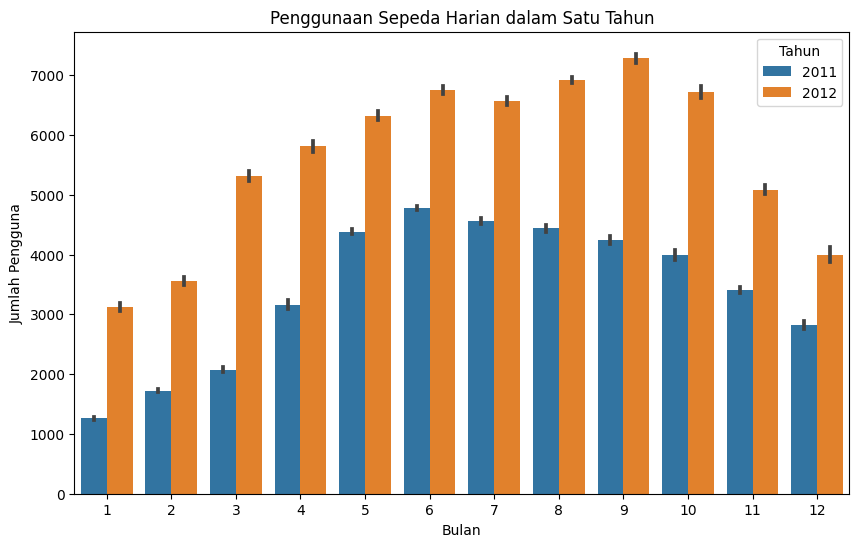

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='mnth_day', y='total_day', data=merge_df, hue='year_day')
plt.legend(title="Tahun")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.title("Penggunaan Sepeda Harian dalam Satu Tahun")
plt.show()


Peningkatan dimulai dari bulan Februari hingga puncaknya di bulan September setelah itu terjadi penurunan. 

## Pertanyaan 2:

Bagaimana hubungan antara penyewaan dengan cuaca?

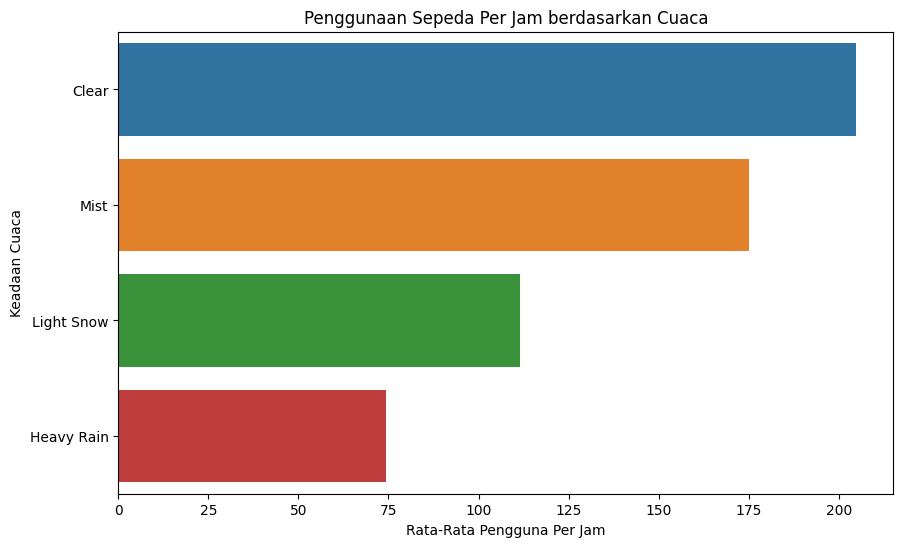

In [33]:
kelompok_cuaca = merge_df.groupby('weathersit_hour')['total_hour'].mean().reset_index().sort_values("weathersit_hour")
plt.figure(figsize=(10,6))
sns.barplot(x='total_hour', y='weathersit_hour', data=kelompok_cuaca)
plt.xlabel("Rata-Rata Pengguna Per Jam")
plt.ylabel("Keadaan Cuaca")
plt.title("Penggunaan Sepeda Per Jam berdasarkan Cuaca")
plt.show()

Cuaca cerah memiliki penggunaan sepeda paling banyak dibandingkan dengan kondisi cuaca lainnya. Data per jam digunakan untuk melihat cuaca karena dalam satu hari kondisi cuaca bisa berbeda-beda

## Pertanyaan 3:

Bagaimana hubungan antara banyaknya penyewaan dengan hari libur?

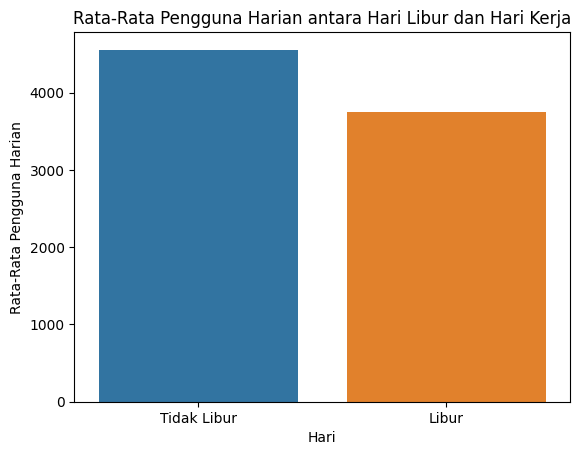

In [34]:
kelompok_holiday = merge_df.groupby('holiday_day')['total_day'].mean().reset_index().sort_values("total_day")
sns.barplot(x='holiday_day', y='total_day', data=kelompok_holiday)
plt.xlabel("Hari")
plt.ylabel("Rata-Rata Pengguna Harian")
plt.xticks([0,1], ['Tidak Libur', 'Libur'])
plt.title("Rata-Rata Pengguna Harian antara Hari Libur dan Hari Kerja")
plt.show()

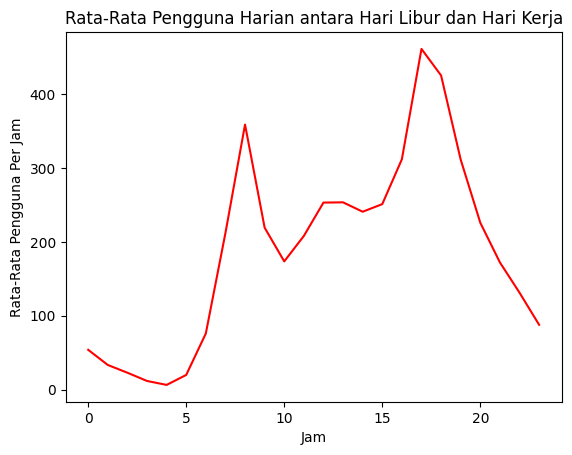

In [35]:
kelompok_jam = merge_df.groupby('hr')['total_hour'].mean().reset_index()
sns.lineplot(x='hr', y='total_hour', data=kelompok_jam, color='red')
plt.xlabel("Jam")
plt.ylabel("Rata-Rata Pengguna Per Jam")
plt.title("Rata-Rata Pengguna Harian antara Hari Libur dan Hari Kerja")
plt.show()

## Pertanyaan 4:

Bagaimana hubungan antara banyaknya penyewaan dengan musim?

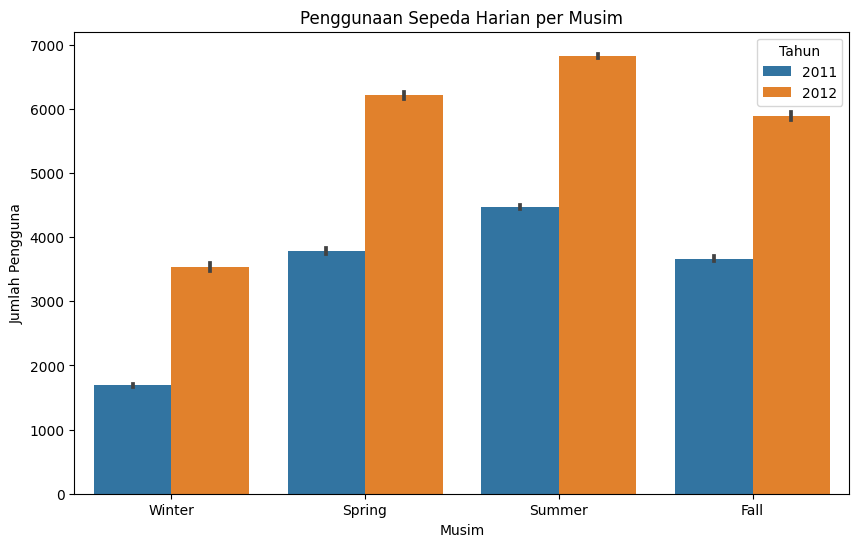

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='season_day', y='total_day', data=merge_df, hue='year_day')
plt.legend(title="Tahun")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna")
plt.title("Penggunaan Sepeda Harian per Musim")
plt.show()

### Pertanyaan 5:
Bagaimana hubungan antara penyewaan dengan suhu, kelembapan, dan kecepatan angin?

<AxesSubplot: >

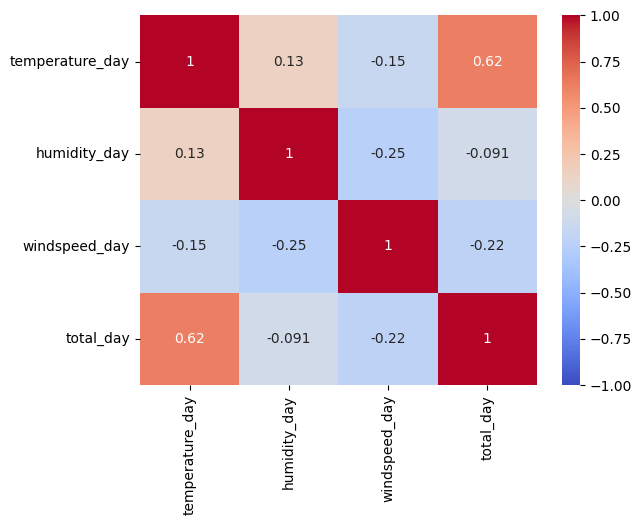

In [37]:
variabel_day = merge_df[['season_day', 'temperature_day', 'humidity_day', 'windspeed_day', 'total_day']]
corr_matrix_day = variabel_day.corr(numeric_only=True, method='spearman')
sns.heatmap(corr_matrix_day, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

Terlihat ada korelasi yang diduga kuat antara suhu harian dengan penggunaan sepeda. Untuk memastikan, berikut adalah model regresi linear antara suhu dengan total penyewa harian

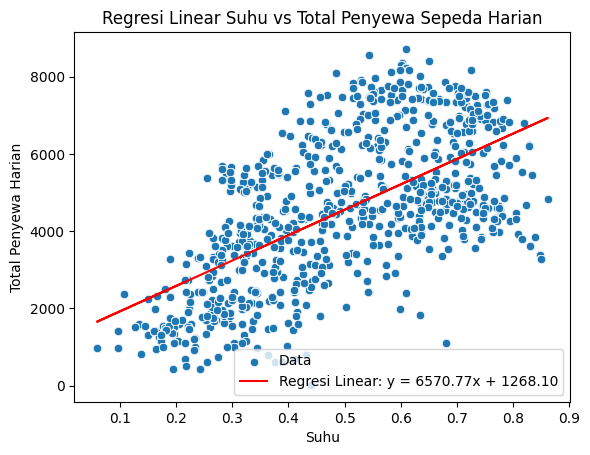

In [38]:
X = merge_df['temperature_day']
y = merge_df['total_day']
sns.scatterplot(x=X, y=y, label="Data")
slope, intercept = np.polyfit(X, y, 1)
line = slope*X+intercept
plt.plot(X, line, color='red', label=f'Regresi Linear: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel("Suhu")
plt.ylabel("Total Penyewa Harian")
plt.title("Regresi Linear Suhu vs Total Penyewa Sepeda Harian")
plt.legend()
plt.show()

## Conclusion

### Conclusion pertanyaan 1:
Peningkatan penggunaan sepeda di mulai pada bulan Februari hingga bulan September. Hal tersebut dikarenakan bulan Februari adalah akhir dari musim dingin dan suhu mulai meningkat sehingga para pesepeda bisa mulai merasa nyaman di jalan. 

### Conclusion pertanyaan 2:
Penggunaan sepeda tertinggi ketika cuaca sedang cerah. Hal ini dikarenakan pengguna sepeda rentan terkena kecelakaan dari kendaraan lain jika cuaca sedang buruk. Selain itu, sangat merepotkan dan berbahaya apabila melewati cuaca buruk dengan sepeda. 

### Conclusion pertanyaan 3:
Penggunaan sepeda lebih banyak terjadi ketika tidak libur dibandingkan hari libur. Hal ini mungkin terjadi karena aktivitas kerja masyarakat. Masyarakat dapat menggunakan sepeda saat hendak pergi bekerja, bersekolah, ataupun berbelanja. Temuan ini diperkuat dengan data penggunaan sepeda mengalami peningkatan drastis dari jam 7 pagi dan menurun dari jam 5 sore.  

### Conclusion pertanyaan 4:
Penggunaan sepeda tertinggi ada pada musim panas. Temuan ini diperkuat dengan temuan pertanyaan 2 yang menyatakan pesepeda meningkat ketika cuaca cerah. Semenjak musim semi dan musim panas hari menjadi lebih panjang maka cuaca pun relatif cerah mengakibatkan banyak orang senang untuk bersepeda

### Conclusion pertanyaan 5:
Tidak ada hubungan yang kuat antara penggunaan sepeda dengan kelembapan udara dan kecepatan angin. Akan tetapi terdapat hubungan tren antara suhu dengan penggunaan sepeda harian meskipun model hubungan antara keduanya tidak begitu baik